In [1]:
import numpy as np


class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _sigmoid(self, x): #private method
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls




Weights: [-0.25755602  0.62157507]
Bias: 0.04617977877329578


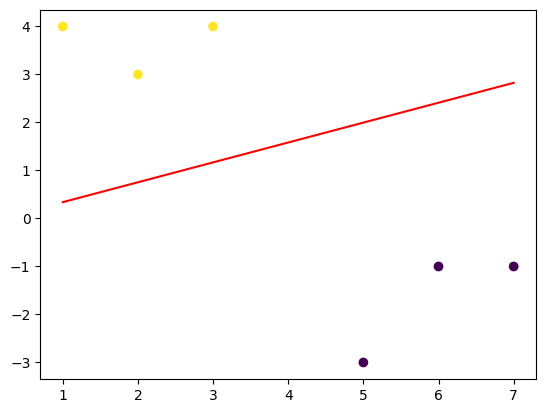

In [ ]:

import matplotlib.pyplot as plt

# Generate sample data
X = np.array([[3, 4], [1, 4], [2, 3], [6, -1], [7, -1], [5, -3]])
y = np.array([1, 1, 1, 0, 0, 0])

# Train model
model = LogisticRegression()
model.fit(X, y)

# Print weights and bias
print(f"Weights: {model.weights}")
print(f"Bias: {model.bias}")

# Plot data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)
x1 = np.array([min(X[:, 0]), max(X[:, 0])])
x2 = (-model.bias - model.weights[0] * x1) / model.weights[1] # y = mx + c => x = (y-c)/m
plt.plot(x1, x2, color='red')
plt.show()

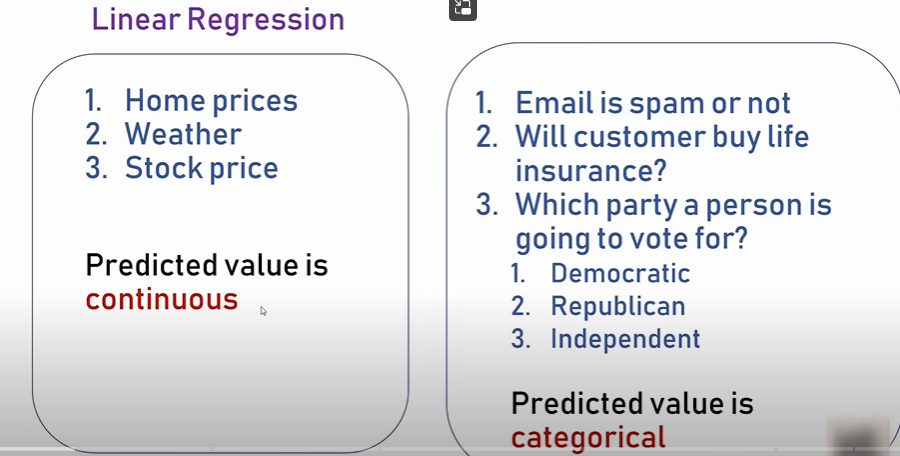


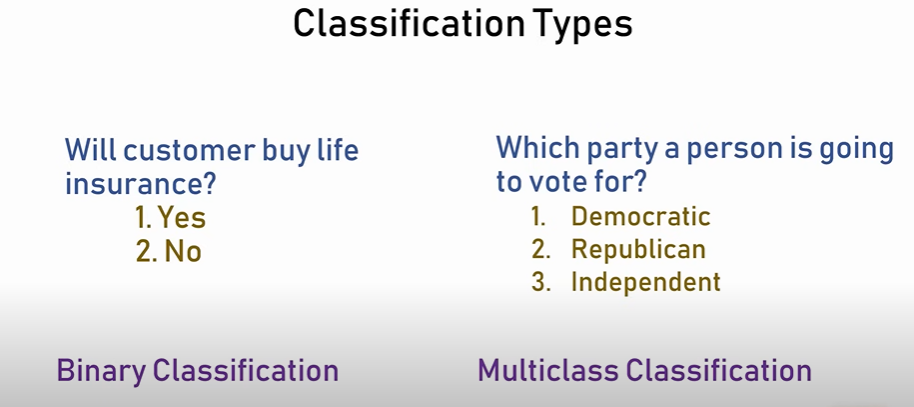

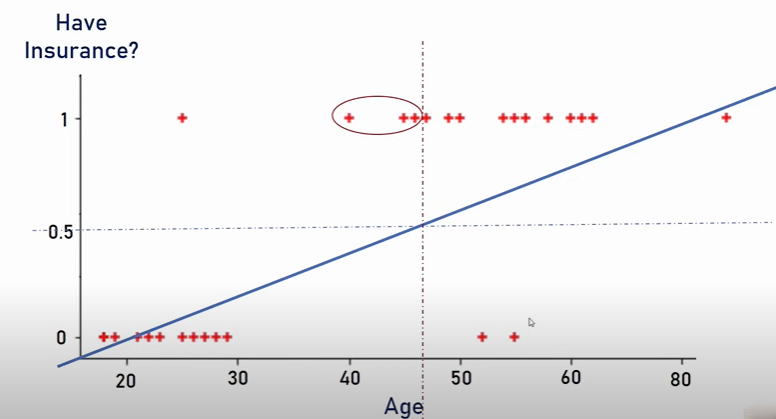

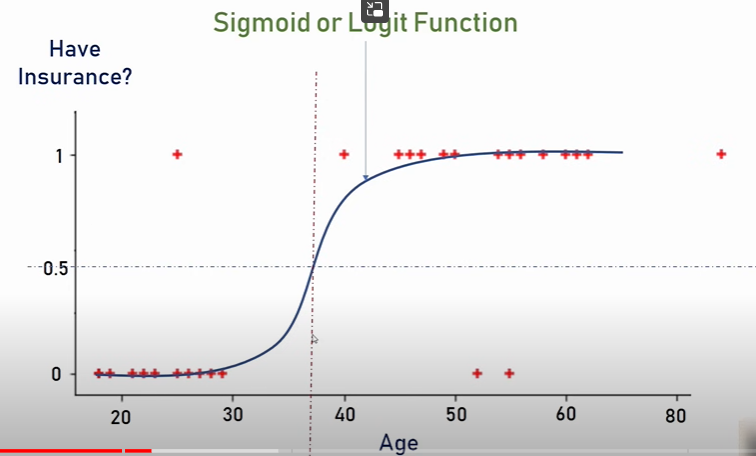

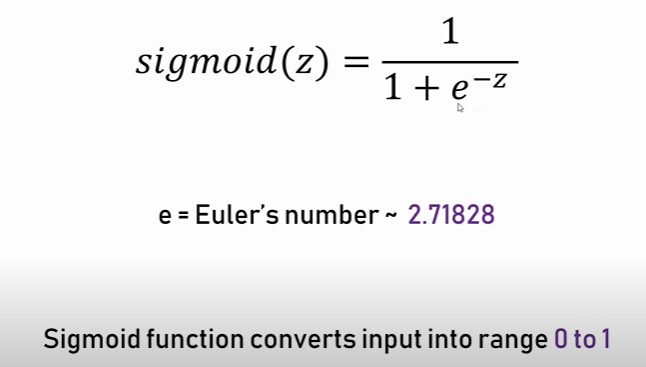

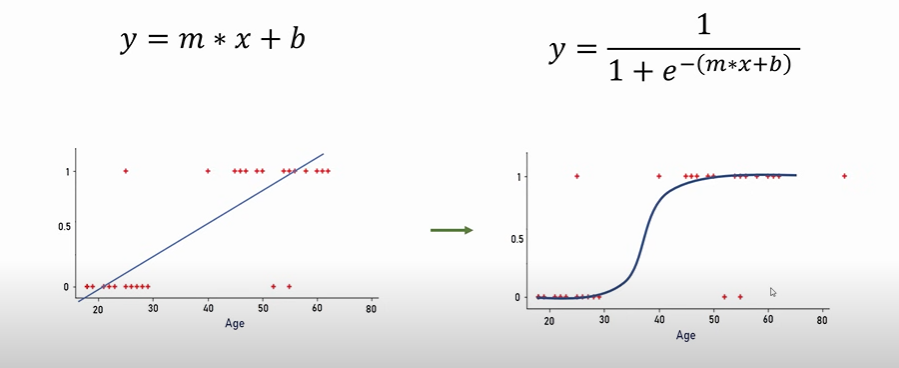

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


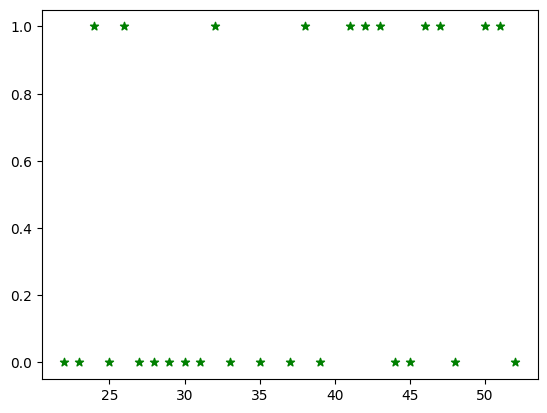

In [3]:
plt.scatter(df.age, df.bought_insurance, marker="*",color="green")


In [4]:
x = df.age

In [5]:
# Calculate sigmoid values
y = 1 / (1 + np.exp(-df.age))


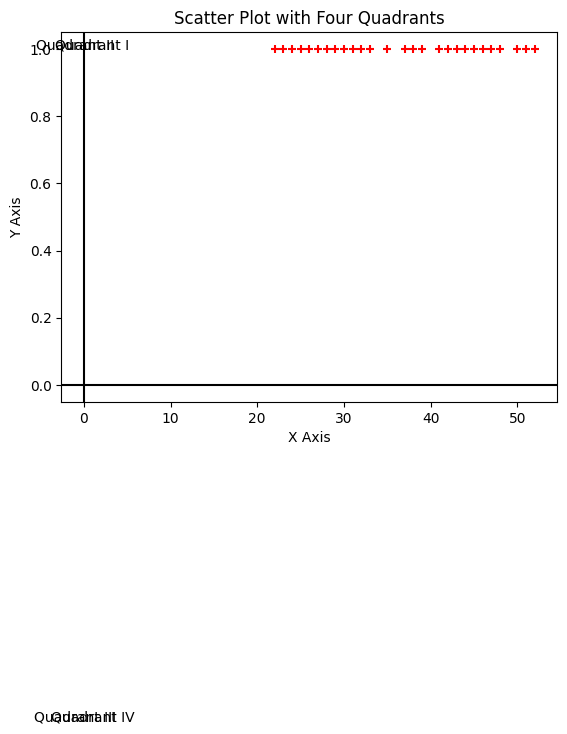

In [20]:

plt.scatter(x,y,marker='+',color='red')

plt.title('Scatter Plot with Four Quadrants')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Define quadrant lines
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')

# Label quadrants
plt.text(1, 1, 'Quadrant I', ha='center')
plt.text(-1, 1, 'Quadrant II', ha='center')
plt.text(-1, -1, 'Quadrant III', ha='center')
plt.text(1, -1, 'Quadrant IV', ha='center')

# Set aspect ratio
# plt.gca().set_aspect('equal')

# Show plot
plt.show()

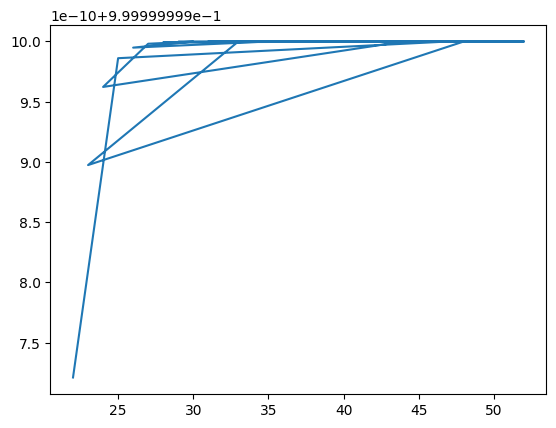

In [10]:
plt.plot(x,y)

In [6]:

from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [8]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:

model.fit(X_train, y_train)

LogisticRegression()

In [11]:

y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 0])

In [15]:
user_input = pd.DataFrame({'age':40},index=[0])

In [16]:
y_pred= model.predict(user_input)  #age
y_pred

array([0])

In [13]:
y_pred= model.predict([[34]])  #age
y_pred

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

softmax activation

predict_proba_ = exp(Z) / Σ(exp(Z))

where:

Z = X @ weights + bias
X: Input features
weights: Learned model weights
bias: Learned model bias


In [26]:

model.predict_proba(X_test) #s a method in scikit-learn that returns the probability estimates for each class in a classification problem.

array([[0.73467391, 0.26532609],
       [0.5797168 , 0.4202832 ],
       [0.78241373, 0.21758627],
       [0.36598986, 0.63401014],
       [0.76722025, 0.23277975],
       [0.34602313, 0.65397687]])

In [27]:

model.score(X_test,y_test)

0.6666666666666666

In [28]:

y_predicted

array([0, 0, 0, 1, 0, 1])


model.coef_ indicates value of m in y=m*x + b equation

In [29]:
model.coef_

array([[0.08710703]])

model.intercept_ indicates value of b in y=m*x + b equation

In [30]:

model.intercept_


array([-3.54457094])

sigmoid function

In [31]:
import math

In [32]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [33]:
age =36
sigmoid(age)

np.float64(0.9999999999999998)

f11

0.99 > 0.5  so the person will buy the insurance